# Implementing a Decision Tree to Compare with AdaBoost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

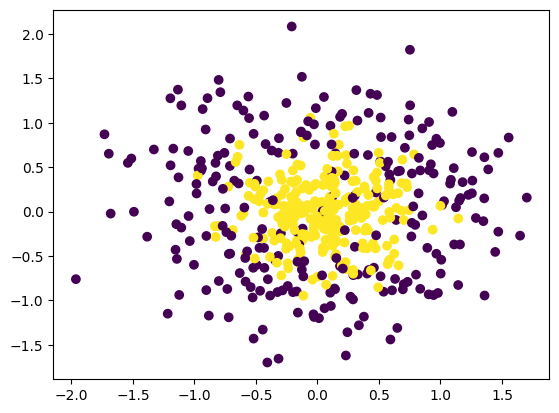

In [4]:

plt.scatter(X[:,0],X[:,1],c=y)

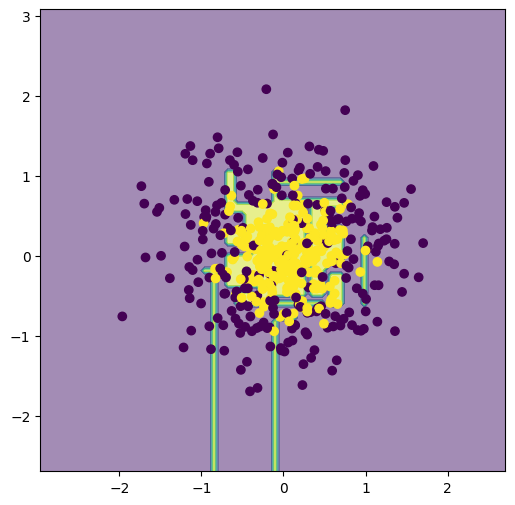

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Data
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23
)

# Model
clf = DecisionTreeClassifier(max_depth=None)
clf.fit(X_train, y_train)

# Plot decision boundary
fig, ax = plt.subplots(figsize=(6, 6))

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
    ax=ax
)

# Plot points
ax.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

np.float64(0.812)

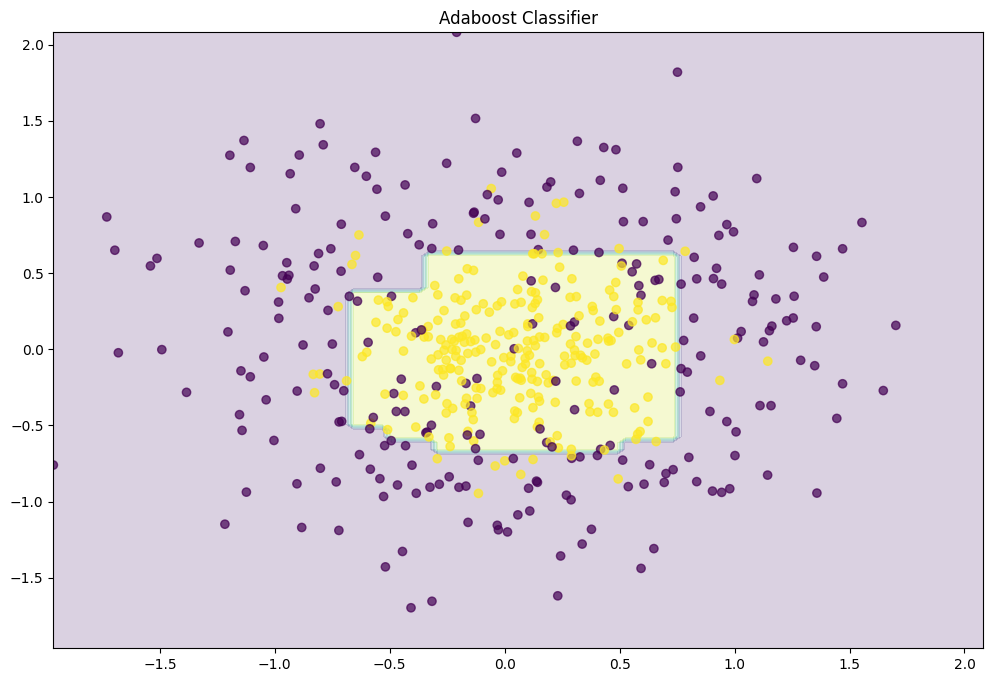

In [15]:
abc = AdaBoostClassifier(n_estimators=1000,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

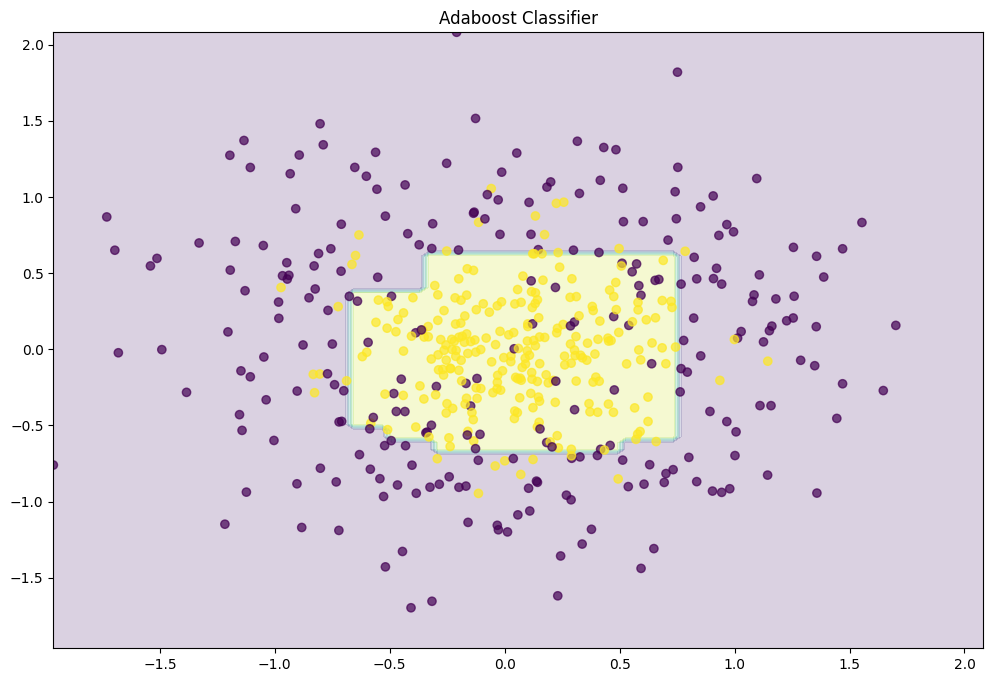

In [16]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

In [20]:
def plot_decision_boundary_tree(clf, X, y, title="Decision Tree Decision Boundary"):
    plt.figure(figsize=(12, 8))

    # Define grid range
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx1, xx2 = np.meshgrid(
        np.linspace(x1_min, x1_max, 300),
        np.linspace(x2_min, x2_max, 300)
    )

    # Predict on grid
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)

    # Plot decision regions
    plt.contourf(xx1, xx2, y_hat, alpha=0.25, cmap="coolwarm")

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


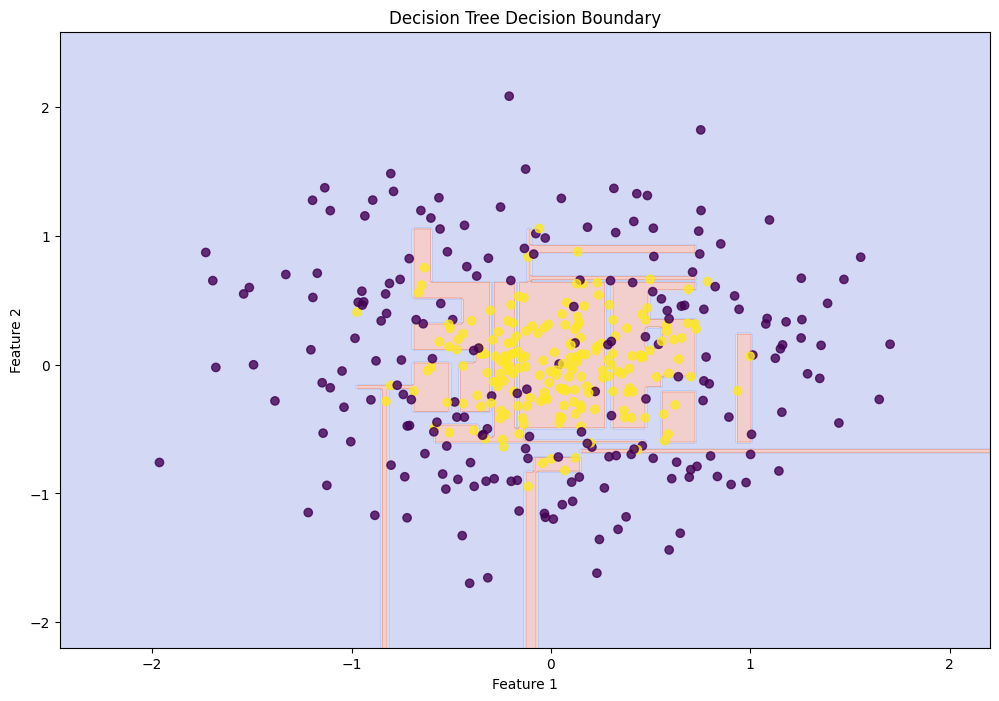

In [21]:
plot_decision_boundary_tree(clf,X_train,y_train)